# 
References: 
  - [The best Forecast Techniques or how to Predit from Time Series Data](https://towardsdatascience.com/the-best-forecast-techniques-or-how-to-predict-from-time-series-data-967221811981)
  - [Holt-Winters Forecasting for Dummies (or Developers) - Part I](https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/)
  
## Smoothing sumary

###  Simple average 

$$ \hat{y}_{k+1} = \frac{1}{k} \sum^{k}_{i=1}y_{i} $$

### Exponential

$$ \hat{y}_{k} = \alpha\,y_{k} + (1 - \alpha)\,\hat{y}_{k-1} $$

### Double Exponential (Holt)

$$ 
\begin{equation}
l_{x} = \alpha\,y_{x} + (1 - \alpha)(\hat{l}_{k-1} +b_{k-1}) \\
b_{x} = \beta(l_{x} - l_{x-1}) + (1 - \beta)\,b_{x-1} \\
\hat{y}_{x+1} = l_{x} + b_{x}
\end{equation}
$$

### Triple Exponential (Holt-Winters)
$$ 
\begin{equation}
l_{x} = \alpha(y_{x} - s_{x-L}) + (1+\alpha)(l_{x-1} +b_{x-1}) \\
b_{x} = \beta(l_{x} - l_{x-1}) + (1-\beta)\beta_{x-1} \\
s_{x} = \gamma(y_{x} - l_{x}) + (1-\gamma)s_{x-L} \\
\hat{y}_{x+m} = l_{x} + m\,b_{x} + s_{x-L+1+(m-1)modL} 
\end{equation}
$$

# Using statsmodel
Reference: 
-[Holt-Winters Exponential Smoothing](https://towardsdatascience.com/holt-winters-exponential-smoothing-d703072c0572)

Index(['01-01-92', '01-02-92', '01-03-92', '01-04-92', '01-05-92', '01-06-92',
       '01-07-92', '01-08-92', '01-09-92', '01-10-92',
       ...
       '01-07-19', '01-08-19', '01-09-19', '01-10-19', '01-11-19', '01-12-19',
       '01-01-20', '01-02-20', '01-03-20', '01-04-20'],
      dtype='object', name='DATE', length=340)

DatetimeIndex(['1992-01-01', '1992-01-02', '1992-01-03', '1992-01-04',
               '1992-01-05', '1992-01-06', '1992-01-07', '1992-01-08',
               '1992-01-09', '1992-01-10',
               ...
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2020-01-01', '2020-01-02',
               '2020-01-03', '2020-01-04'],
              dtype='datetime64[ns]', name='DATE', length=340, freq=None)

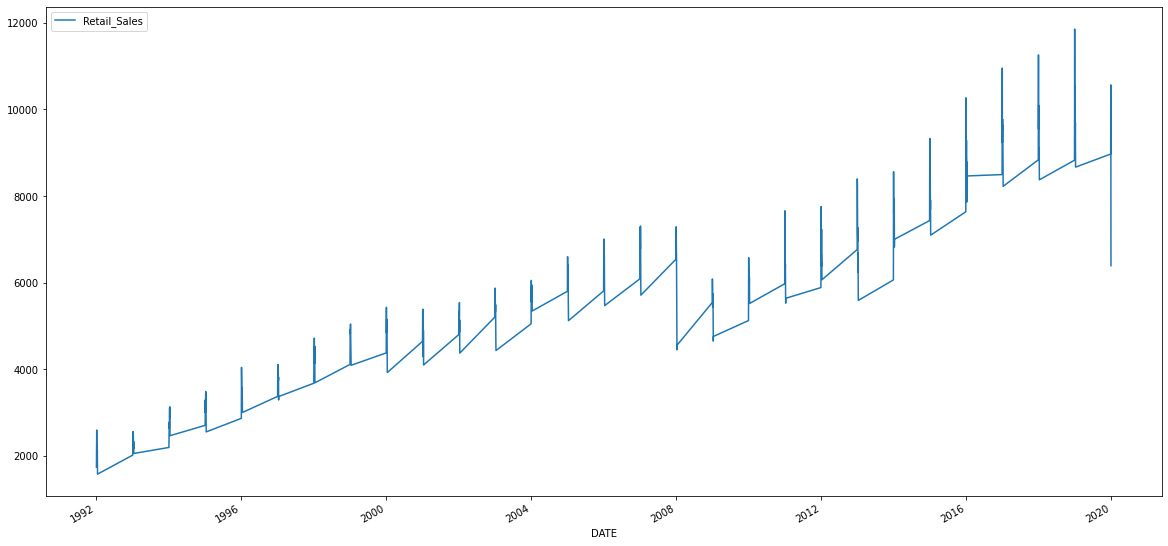

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

df = pd.read_csv(
    'retail_sales_used_car_dealers_us_1992_2020.csv', 
    header=0,
    index_col=[0]
)
display(df.index)
df.index = pd.to_datetime(df.index)
display(df.index)

df.plot(figsize=(20,10))
plt.show()

In [2]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             Retail_Sales   No. Observations:                  328
Model:             ExponentialSmoothing   SSE                       23654407.257
Optimized:                         True   AIC                           3701.023
Trend:                         Additive   BIC                           3761.711
Seasonal:                Multiplicative   AICC                          3703.237
Seasonal Periods:                    12   Date:                 Sun, 14 Mar 2021
Box-Cox:                          False   Time:                         14:16:06
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3939286                alpha                 True
smoothing_trend          

/home/joaoantoniocardoso/workspace_TCC/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/joaoantoniocardoso/workspace_TCC/env/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


/home/joaoantoniocardoso/workspace_TCC/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


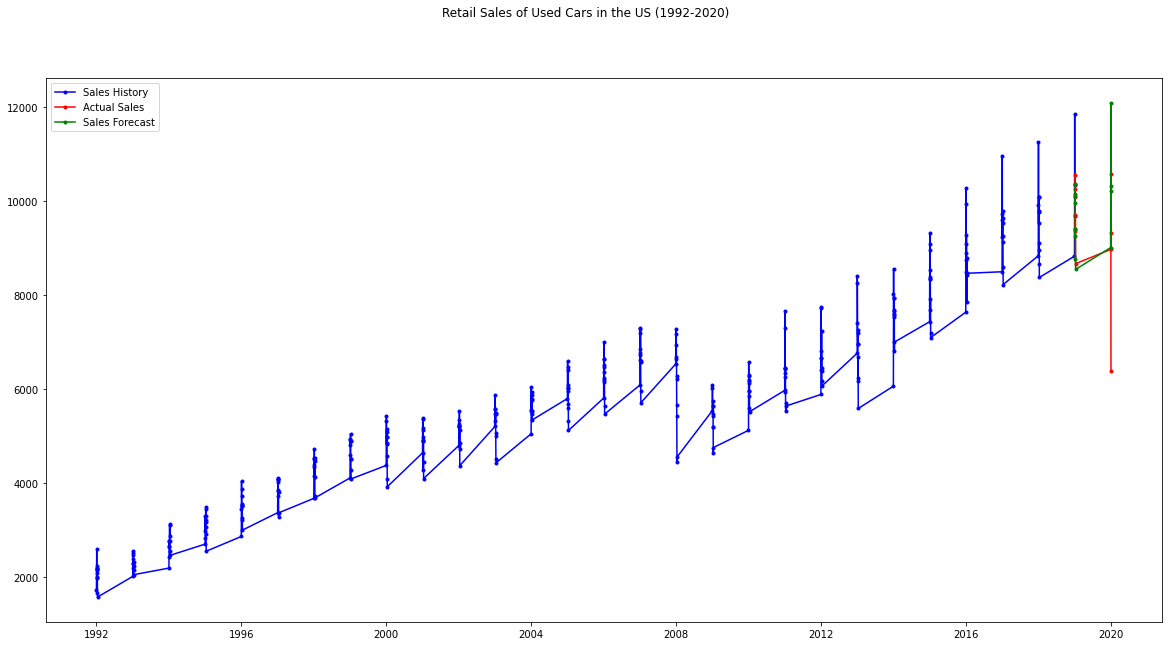

In [3]:
sales_forecast = fitted.forecast(steps=12)

fig = plt.figure(figsize=(20,10))
fig.suptitle('Retail Sales of Used Cars in the US (1992-2020)')
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()